In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from numpy.random import seed
from numpy.random import randint
from math import sqrt
import string
import sys

### Read CSV
##### Input: filename

In [19]:

def read_file(name):
    df = pd.read_csv('../data/'+name);
    # node names array
    namesArr = df.columns.values
    print("**** Node names array ****\n",namesArr)

    # nodes dictionary
    dict = {}
    for i in range(0, df.columns.size):
        dict[df.columns[i]] = i;
    print("\n**** Nodes dictionary ****")
    for x in dict:
      print(x,"-", dict[x])  

    # distances matrix
    print("\n**** Distances matrix ****")
    print('\n'.join(df.to_string(index = False).split('\n')[1:]))


**** Node names array ****
 ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']

**** Nodes dictionary ****
A - 0
B - 1
C - 2
D - 3
E - 4
F - 5
G - 6
H - 7
I - 8
J - 9

**** Distances matrix ****
 0 59 48 69 54 91 55 34 81 72
59  0 45 19 45 73 48 13 13 42
48 45  0 97 11 65 12 58 70 45
69 19 97  0 31 94 23 66 71 13
54 45 11 31  0 95 37 47 24 49
91 73 65 94 95  0 62 35 38 61
55 48 12 23 37 62  0 82 96 47
34 13 58 66 47 35 82  0 10 47
81 13 70 71 24 38 96 10  0 63
72 42 45 13 49 61 47 47 63  0


### Generate n nodes
##### Input: n (number of nodes), lim - space limit

-> n: 5
-> lim: 10

**** Nodes position (x,y) ****
( 5 , 8 )
( 9 , 5 )
( 0 , 0 )
( 1 , 7 )
( 6 , 9 )

**** Nodes dictionary ****
A - 0
B - 1
C - 2
D - 3
E - 4

**** Distances matrix ****
0.0  5.0  9.4 4.1  1.4
5.0  0.0 10.3 8.2  5.0
9.4 10.3  0.0 7.1 10.8
4.1  8.2  7.1 0.0  5.4
1.4  5.0 10.8 5.4  0.0


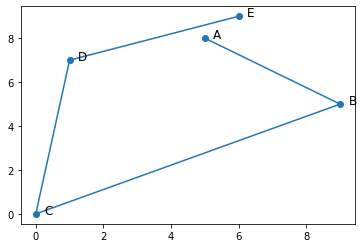

In [15]:
def generate_n_nodes(n,lim):
    # Nodes position (x,y)
    seed(1)
    coord = []
    xList = []
    yList = []
    for i in range(0, n):
        x = randint(0, lim)
        xList.append(x)
        y = randint(0, lim)
        yList.append(y)
        coord.append((x,y))
    print("\n**** Nodes position (x,y) ****")
    mx = float('-inf')
    for x,y in coord:
        if x > mx:
            mx = x
        if y > mx:
            mx = y
        print("(",x,",",y,")")
    # Nodes Dictionary
    dict = {}
    print("\n**** Nodes dictionary ****")
    plt.plot(xList,yList,zorder=1) 
    plt.scatter(xList,yList,zorder=2)
    alphabet_string = string.ascii_uppercase
    alphabet_list = list(alphabet_string)
    alphabet_list = alphabet_list[:n]
    for i, txt in enumerate(alphabet_list):
        dict[txt] = i;
        plt.annotate(txt, (xList[i]+.25, yList[i]), fontsize=12)
    for x in dict:
      print(x,"-", dict[x])  

    # distance matrix
    print("\n**** Distances matrix ****")
    # d=√((x_2-x_1)²+(y_2-y_1)²)
    tempList = []
    for x,y in coord:
        for i,j in coord :
            tempList.append(round(sqrt(pow((x-i),2) + pow((y-j),2) ),1))
    mat = []
    while tempList != []:
      mat.append(tempList[:n])
      tempList = tempList[n:]
    dist_mat = pd.DataFrame(mat)
    print('\n'.join(dist_mat.to_string(index = False).split('\n')[1:]))


**** Node names array ****
 ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']

**** Nodes dictionary ****
A - 0
B - 1
C - 2
D - 3
E - 4
F - 5
G - 6
H - 7
I - 8
J - 9

**** Distances matrix ****
 0 59 48 69 54 91 55 34 81 72
59  0 45 19 45 73 48 13 13 42
48 45  0 97 11 65 12 58 70 45
69 19 97  0 31 94 23 66 71 13
54 45 11 31  0 95 37 47 24 49
91 73 65 94 95  0 62 35 38 61
55 48 12 23 37 62  0 82 96 47
34 13 58 66 47 35 82  0 10 47
81 13 70 71 24 38 96 10  0 63
72 42 45 13 49 61 47 47 63  0

---------------------------------------------------------------------------------
-> n: 5
-> lim: 10

**** Nodes position (x,y) ****
( 5 , 8 )
( 9 , 5 )
( 0 , 0 )
( 1 , 7 )
( 6 , 9 )

**** Nodes dictionary ****
A - 0
B - 1
C - 2
D - 3
E - 4

**** Distances matrix ****
0.0  5.0  9.4 4.1  1.4
5.0  0.0 10.3 8.2  5.0
9.4 10.3  0.0 7.1 10.8
4.1  8.2  7.1 0.0  5.4
1.4  5.0 10.8 5.4  0.0


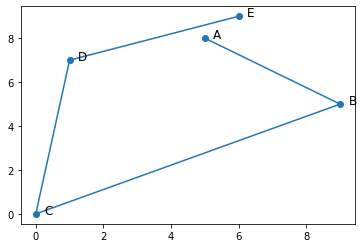

In [25]:
# MAIN
read_file("adjacency_matrix.csv");
print("\n---------------------------------------------------------------------------------")
generate_n_nodes(int(input("-> n: ")),int(input("-> lim: ")))